In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_final = pd.read_csv("data/df_final.csv", delimiter=";")
df_kunden = df_final[df_final["Kunde"] == True]
df_besucher = df_final[df_final["Besucher"] == True]

<font size = "8">Elektrauto AG<font/>

<i>HWR Berlin, Sommersemester 2024</i>

<i>Phillip Raouf, Gereon Dregger, Lan Nhi Vu<i/>
  


# N1: Wie viele Autos wurden verkauft?

In [7]:
print(df_final.Preis.count())

1104


## N2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [8]:
# N2 Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?
# Verwendung von max-, min- und mean-Funktion - angewendet auf die Preisspalte
print("Höchstpreis: " + str(df_final.Preis.max().round(2)))
print("Mindestpreis: " + str(df_final.Preis.min().round(2)))
print("Durchschnittspreis: " + str(df_final.Preis.mean().round(2)))

Höchstpreis: 149827.25
Mindestpreis: 21471.65
Durchschnittspreis: 88905.86


## N3: Wie hoch war der Gesamtumsatz

In [9]:
# Die Preisspalte aufsummieren
print("Gesamtumsatz: " + str(df_final.Preis.sum().round(2)))

Gesamtumsatz: 98152068.52


In [ ]:
# N4 Wie viele Autos wurden pro Bundesland verkauft?

In [ ]:
# Nach Niederlassungen gruppieren, danach zählen 
df_numbers = df_final.groupby(df_final.Niederlassung).count()
df_numbers = df_numbers.Preis
print(df_numbers)

In [ ]:
# Beispielhaft anhand von Sachsen die vorherige Auflistung verifizieren
# Bei Preis existieren 89 Einträge wie auch oben, also korrekt!
df_final.query("Niederlassung == 'Sachsen'").count()

In [ ]:
# N5 Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [10]:
# Nach Niederlassung gruppieren, dann den Durchschnitt des Preises nehmen, die Werte absteigend sortieren und runden
df_final.groupby(df_final.Niederlassung) \
    .Preis.mean() \
    .sort_values() \
    .round(2)

Niederlassung
Hamburg                 85549.50
Hessen                  85864.93
Brandenburg             86673.64
Niedersachsen           87165.91
Nordrhein-Westfalen     88451.76
Bayern                  89344.31
Sachsen                 89455.08
Berlin                  89584.98
Thüringen               90816.99
Baden-Württemberg       90969.56
Düsseldorf             120215.50
Name: Preis, dtype: float64

Text(0, 0.5, 'Umsatz')

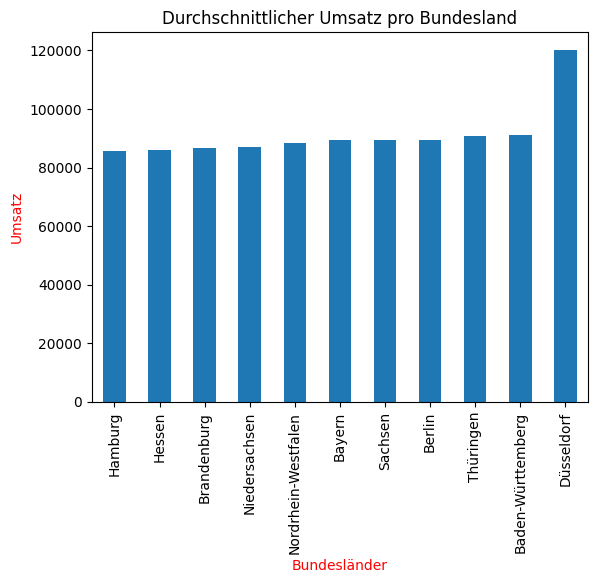

In [11]:
# Barplot der Ergebnisse erstellen. 

avg_umsatz = df_final.groupby(df_final.Niederlassung) \
    .Preis.mean() \
    .sort_values() \
    .round(2).plot(kind="bar", title="Durchschnittlicher Umsatz pro Bundesland")
plt.xlabel("Bundesländer", color="r")
plt.ylabel("Umsatz", color="r")

# Düsseldorf ist Spitzenreiter und sticht deutlich hervor
# Das erregt den Verdacht, das der dortige Standort größer, über ein besonderes Angebot verfügt oder das beste Marketing betreibt


In [ ]:
# N7 Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

Prozentsatz Männer = 61.2%
Prozentsatz Frauen = 38.8%


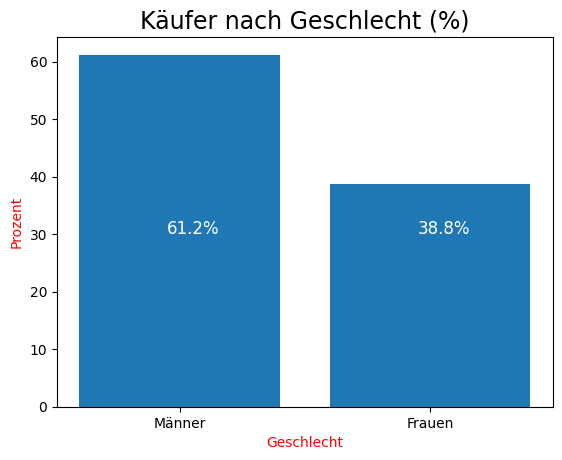

In [14]:
# Gesamtanzahl an Geschlechts-Eintragungen bestimmen -> Spalte "Geschlecht" auswählen und zählen
# Alternativ könnte man die .shape Funktion verwenden
gesamt = df_final.Geschlecht.count()

# Männer haben eine 1 erhalten in der Spalte. 
# Durch das aufsummieren erhalten wir die Gesamtanzahl an Männern, die wir dann ins Verhältnis zur Gesamtzahl der Eintragungen setzen können. 
männer = df_final.Geschlecht.sum()
männer_prozent = (männer/gesamt*100).round(2)
frauen_prozent = (100-männer_prozent.round(2))

print("Prozentsatz Männer = " + str(männer_prozent) + "%")
print("Prozentsatz Frauen = " + str(frauen_prozent) + "%")

# Barplot erstellen um die Ergebnisse zu veranschaulichen
prozent_h = [männer_prozent, frauen_prozent]
labels = ["Männer", "Frauen"]
plt.bar(labels, prozent_h)
plt.xlabel("Geschlecht", color="r")
plt.ylabel("Prozent", color="r")
plt.title("Käufer nach Geschlecht (%)", fontsize=17)
plt.text(x=-0.05, y=30,s=(str(männer_prozent) + "%"), color="white", fontsize=12)
plt.text(x=0.95, y=30,s=(str(frauen_prozent) + "%"), color="white", fontsize=12)
plt.show()

# Männer sind unsere Hauptkundengruppe, was eine wertvolle Information für das Marketing darstellt

In [ ]:
# N8 Durchschnittsalter Kunden/Besucher

In [19]:
# Auf die ursprünglichen Dataframes zugreifen, um jeweils den Durchschnitt zu extrahieren
# Alternativ hätte man im final_df die Einträge auswählen müssen, wo > 0 für Kunden und NaN für Besucher
int("Durchschnittsalter Kunden: " + str(df_kunden.Alter.mean().round(2)))
print("Durchschnittsalter Besucher: " + str(df_besucher.Alter.mean().round(2)))

Durchschnittsalter Kunden: 50.38
Durchschnittsalter Besucher: 49.88


In [ ]:
# N16 Welche Variable beeinflusst Preis am meisten?

In [ ]:
# N20 Vorschläge für zusätzliche Datenerhebung